In [ ]:
import math
import brian2 as b2
from brian2 import * 
from brian2tools import *
from brian2 import collect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import pandas as pd
import neurodynex3 as nd3
from functions_spectrum import *
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import random
%matplotlib inline
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, spike_tools
from neurodynex3.tools import plot_tools, input_factory
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
import tqdm
import pickle
import logging
logging.getLogger(b2.__name__).setLevel(logging.ERROR)
logging.getLogger(nd3.__name__).setLevel(logging.ERROR)

In [2]:
spikes_E = pd.read_csv('spikes_E_EE_before.csv')
spikes_I = pd.read_csv('spikes_I_EE_before.csv')
spikes_E_after = pd.read_csv('spikes_E_EE_after.csv')
spikes_I_after = pd.read_csv('spikes_I_EE_after.csv')
rate_E = pd.read_csv('rate_E_EE_before.csv')
rate_I = pd.read_csv('rate_I_EE_before.csv')
rate_E_after = pd.read_csv('rate_E_EE_after.csv')
rate_I_after = pd.read_csv('rate_I_EE_after.csv')

In [25]:
E_I_full = np.loadtxt('E_I_full_EE.csv')
E_I_full_spikes = np.loadtxt('E_I_full_spikes_EE.csv')


In [4]:
import pickle


with open('W_evolution_EE_w.pkl', 'rb') as f:
    W_evolution_EE = pickle.load(f)
W_evolution_EE_t = np.loadtxt('W_evolution_EE_t.csv')



In [5]:
weights_before = []
weights_after = []
for i in W_evolution_EE:
    weights_before.append(i[0])
    weights_after.append(i[-1])

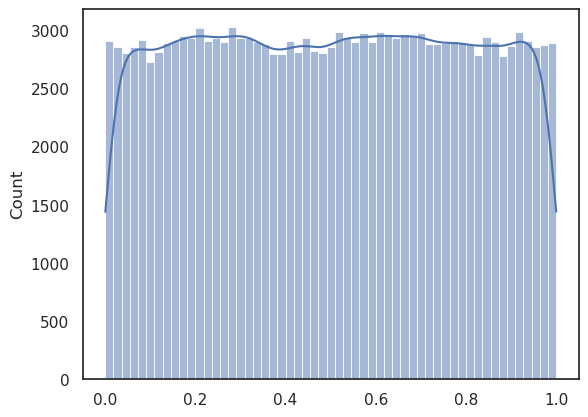

In [6]:
import seaborn as sns
sns.set_theme(style='white')
sns.histplot(weights_before, kde=True)
plt.grid(False)

Text(0.5, 0, 'Num')

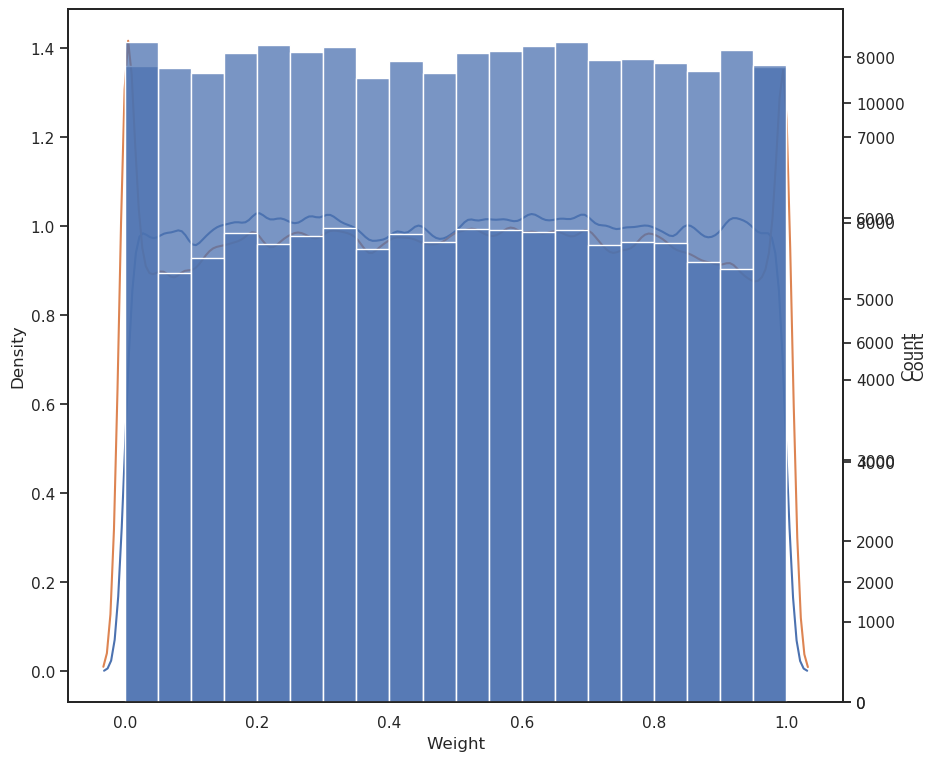

In [ ]:
N = 100
nums = weights_before
df = pd.DataFrame(nums, columns=["Weight"])
fig, ax1 = plt.subplots(figsize=(10, 9))
sns.kdeplot(data=df, x="Weight", bw_adjust=.4,ax=ax1)
ax2 = ax1.twinx()
sns.histplot(data=df, x="Weight", discrete=False, ax=ax2, bins = 20)
nums = weights_after
df = pd.DataFrame(nums, columns=["weight"])
sns.kdeplot(data=df, x="weight",  bw_adjust=.4, ax=ax1)
ax2 = ax1.twinx()
sns.histplot(data=df, x="weight", discrete=False, ax=ax2, bins = 20)
plt.xlabel("Num")

Text(0.5, 0, 'Num')

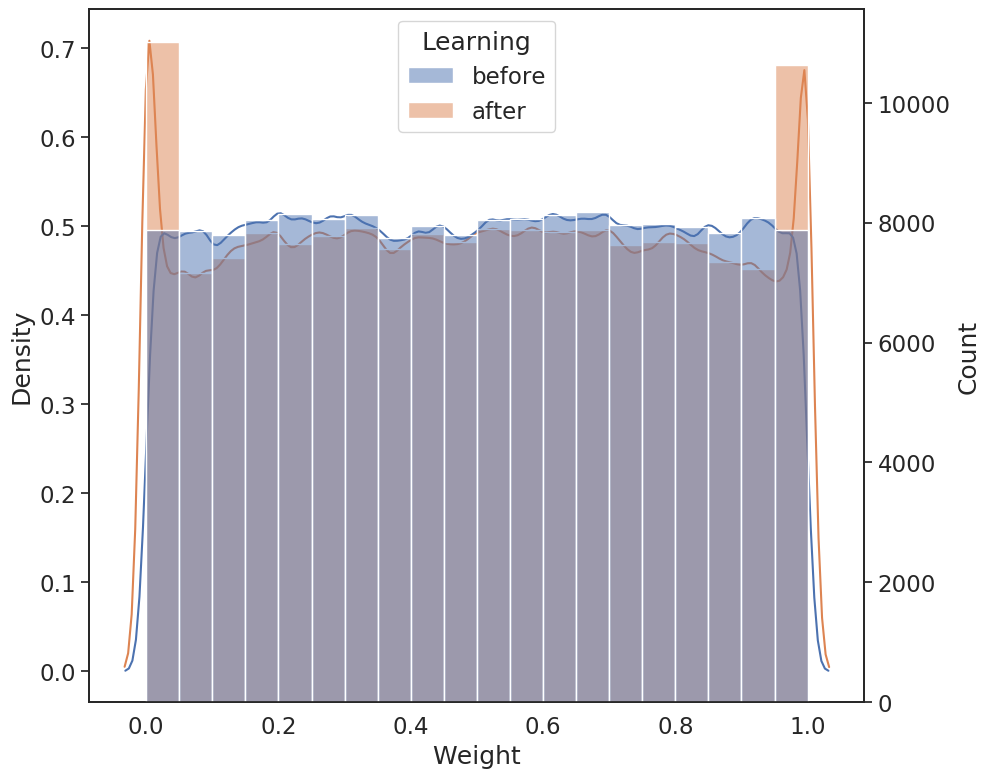

In [ ]:
sns.set(font_scale=1.5, style='white')

nums = weights_before + weights_after
stdp = ['before']*len(weights_before) + ['after']*len(weights_after)
df = pd.DataFrame({"Weight": nums, "Learning": stdp})
fig, ax1 = plt.subplots(figsize=(10, 9))
ax2 = ax1.twinx()
sns.histplot(data=df, x="Weight", discrete=False, ax=ax2, bins = 20, alpha = 0.5, hue = "Learning")
sns.kdeplot(data=df, x="Weight", bw_adjust=.4,ax=ax1,  hue = "Learning", legend = False)
ax1.set_ylabel("Density", fontsize=18)
ax1.set_xlabel("Weight", fontsize=18)
ax2.set_ylabel("Count", fontsize=18)
plt.xlabel("Num")

In [27]:
spikes_E_neur = list(spikes_E.i)
my_dict = {i:spikes_E_neur.count(i)/2.5 for i in range(4000)}
my_dict = dict(sorted(my_dict.items()))

In [28]:
spikes_I_neur = list(spikes_I.i)
my_dict_I = {i:spikes_I_neur.count(i)/2.5 for i in range(1000)}
my_dict_I = dict(sorted(my_dict_I.items()))

In [29]:
spikes_E_neur_after = list(spikes_E_after.i)
my_dict_after = {i:spikes_E_neur_after.count(i)/2.5 for i in range(4000)}
my_dict_after = dict(sorted(my_dict_after.items()))

In [31]:
spikes_I_neur_after = list(spikes_I_after.i)
my_dict_after_I = {i:spikes_I_neur_after.count(i)/2.5 for i in range(1000)}
my_dict_after_I = dict(sorted(my_dict_after_I.items()))

(-5, 55)

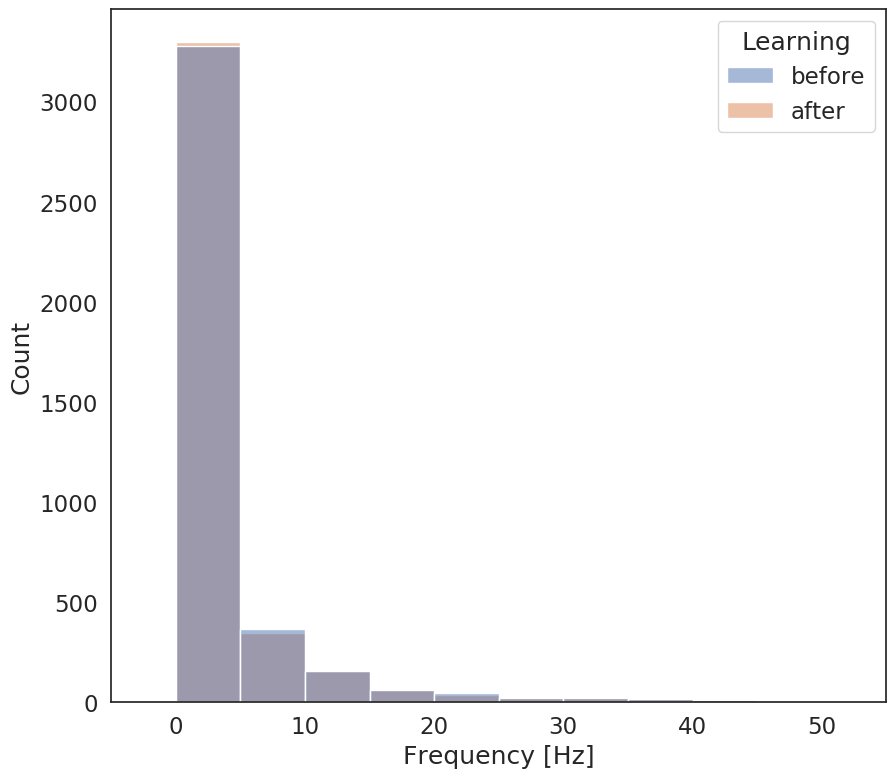

In [ ]:

sns.set(font_scale=1.5, style='white')
stdp = ['before']*len(list(my_dict.values())) + ['after']*len(list(my_dict_after.values()))
df = pd.DataFrame({"Frequency": list(my_dict.values()) + list(my_dict_after.values()), "Neuron indx": list(my_dict.keys()) + list(my_dict_after.keys()), "Learning": stdp})
fig, ax1 = plt.subplots(figsize=(10, 9))
sns.histplot(data=df, x="Frequency", discrete=False, ax=ax1, bins = 20, alpha = 0.5, hue = "Learning")
ax1.set_ylabel("Count", fontsize=18)
ax1.set_xlabel("Frequency [Hz]", fontsize=18)
ax1.set_xlim(-5,55)


In [36]:
np.mean(list(my_dict_after_I.values()))

16.287200000000002

(-5, 125)

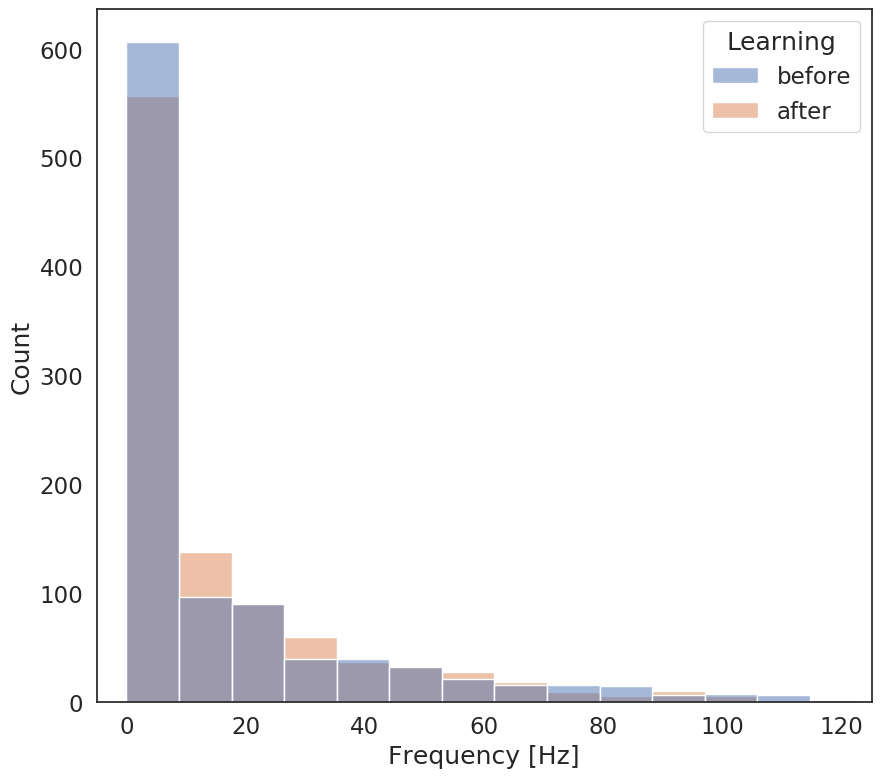

In [ ]:
stdp = ['before']*len(list(my_dict_I.values())) + ['after']*len(list(my_dict_after_I.values()))
df = pd.DataFrame({"Frequency": list(my_dict_I.values()) + list(my_dict_after_I.values()), "Neuron indx": list(my_dict_I.keys()) + list(my_dict_after_I.keys()), "Learning": stdp})
fig, ax1 = plt.subplots(figsize=(10, 9))
sns.histplot(data=df, x="Frequency", discrete=False, ax=ax1, bins = 20, alpha = 0.5, hue = "Learning")
ax1.set_ylabel("Count", fontsize=18)
ax1.set_xlabel("Frequency [Hz]", fontsize=18)
ax1.set_xlim(-5,125)


In [ ]:
# Specify the signal and simulation properties:
delta_t = 0.1 * ms
f_sampling = 1/0.1 * Hz
T_init = 200 * ms
k = 5 #1
N_samples = 5000 #25000
T_signal = 500 *ms #2500
T_sim = k * T_signal + T_init
f_max = 1./(2. * delta_t)
delta_f = 1/(0.1*N_samples) * Hz
N_init = 0

[ 0. 10.  0. ... 10. 10. 20.]
[10. 30.  0. ... 20. 40. 10.]
54


Text(0.5, 1.0, "Power Spectrum of interneurons' population activity for EE plasticity")

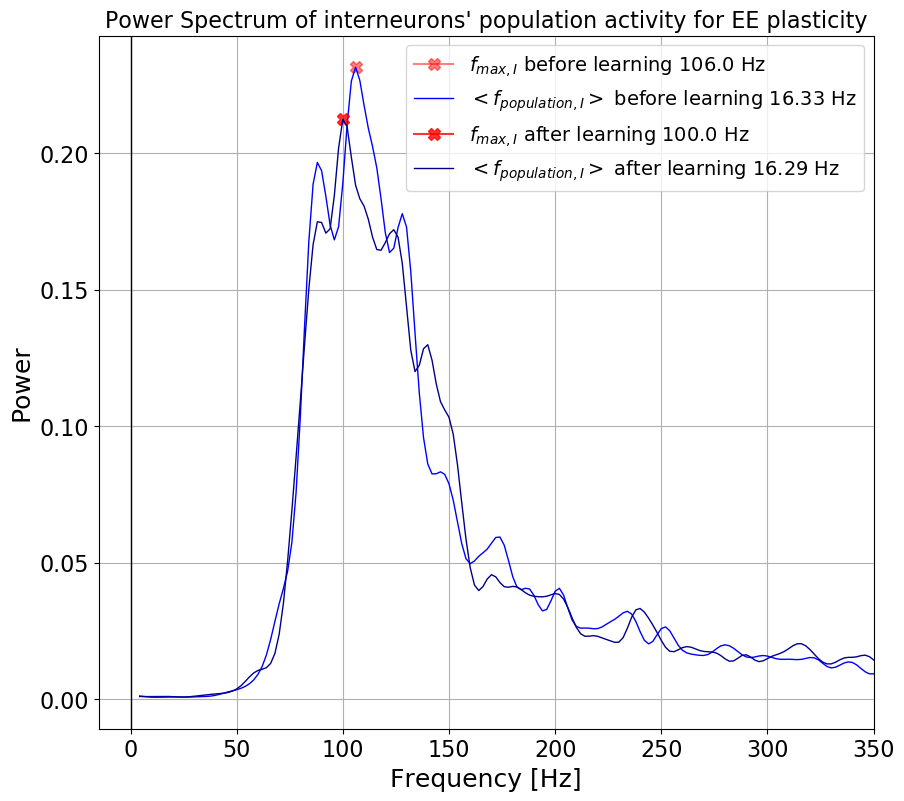

In [ ]:
pop_freqs, pop_ps, average_population_rate = get_population_activity_power_spectrum(rate_I, delta_f, k, T_init)
pop_freqs_after, pop_ps_after, average_population_rate_after = get_population_activity_power_spectrum(rate_I_after, delta_f, k, T_init)
print(list(pop_ps_after[1:]).index(max(pop_ps_after[1:])))
max_freq = 300 *Hz
x_sm = np.array(pop_freqs[1:])
y_sm = np.array(pop_ps[1:])
x_smooth = np.linspace(x_sm.min(), x_sm.max(), 5000)
sigma = 2
x_g1d_2 = gaussian_filter1d(pop_freqs[1:], sigma)
y_g1d_2 = gaussian_filter1d(pop_ps[1:], sigma)
x_g1d_after = gaussian_filter1d(pop_freqs_after[1:], sigma)
y_g1d_after = gaussian_filter1d(pop_ps_after[1:], sigma)
tck = splrep(pop_freqs[1:], pop_ps[1:], s=0)
tck_s = splrep(pop_freqs[1:], pop_ps[1:], s=10)
fig = figure(figsize=(10, 9))
plt.plot(x_g1d_2[list(y_g1d_2).index(max(y_g1d_2))], max(y_g1d_2), marker = "X", markersize = 8, color = "red", alpha = 0.5, label = '$f_{max, I}$ before learning %s Hz'  % np.round(x_g1d_2[list(y_g1d_2).index(max(y_g1d_2))],2))
plt.plot(x_g1d_2, y_g1d_2, 'b', linewidth=1, label = '$<f_{population, I}>$ before learning %s Hz'  % np.round(np.mean(rate_I.rate),2))
plt.plot(x_g1d_after[list(y_g1d_after).index(max(y_g1d_after))], max(y_g1d_after), marker = "X", markersize = 8, color = "red", alpha = 0.8, label = '$f_{max, I}$ after learning %s Hz'  % np.round(x_g1d_after[list(y_g1d_after).index(max(y_g1d_after))],2))
plt.plot(x_g1d_after, y_g1d_after, "darkblue", linewidth=1, label = '$<f_{population, I}>$ after learning %s Hz'  % np.round(np.mean(rate_I_after.rate),2))
plt.axvline(x=0., lw=1, color="k")
plt.xlim([-.05*max_freq/b2.Hz, 350])
plt.grid()
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Frequency [Hz]",fontsize = 18)
plt.ylabel("Power",fontsize = 18)
plt.title("Power Spectrum of interneurons' population activity for EE plasticity", fontsize = 16)

[0.  2.5 5.  ... 7.5 0.  2.5]
[ 2.5  2.5  0.  ... 17.5  7.5  5. ]
41


Text(0.5, 1.0, "Power Spectrum of pyramidals' population activity for EE plasticity")

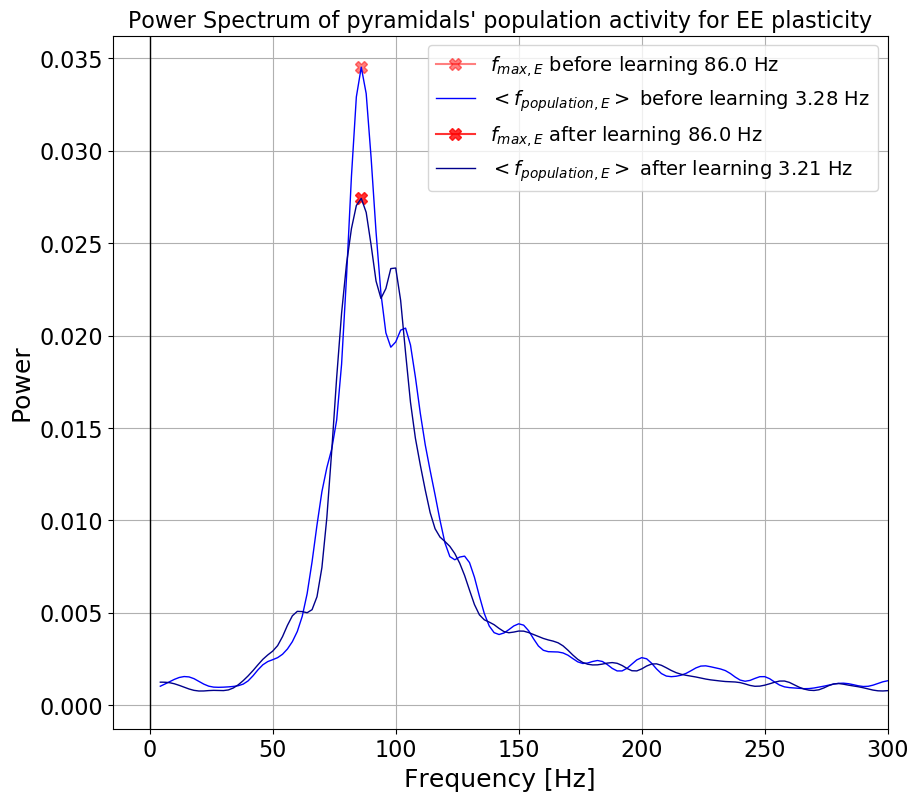

In [ ]:
pop_freqs, pop_ps, average_population_rate = get_population_activity_power_spectrum(rate_E, delta_f, k, T_init)
pop_freqs_after, pop_ps_after, average_population_rate_after = get_population_activity_power_spectrum(rate_E_after, delta_f, k, T_init)
print(list(pop_ps_after[1:]).index(max(pop_ps_after[1:])))
max_freq = 300 *Hz
x_sm = np.array(pop_freqs[1:])
y_sm = np.array(pop_ps[1:])
x_smooth = np.linspace(x_sm.min(), x_sm.max(), 5000)
sigma = 2
x_g1d_2 = gaussian_filter1d(pop_freqs[1:], sigma)
y_g1d_2 = gaussian_filter1d(pop_ps[1:], sigma)
x_g1d_after = gaussian_filter1d(pop_freqs_after[1:], sigma)
y_g1d_after = gaussian_filter1d(pop_ps_after[1:], sigma)
fig = figure(figsize=(10, 9))
plt.plot(x_g1d_2[list(y_g1d_2).index(max(y_g1d_2))], max(y_g1d_2), marker = "X", markersize = 8, color = "red", alpha = 0.5, label = '$f_{max, E}$ before learning %s Hz'  % np.round(x_g1d_2[list(y_g1d_2).index(max(y_g1d_2))],2))
plt.plot(x_g1d_2, y_g1d_2, 'b', linewidth=1, label = '$<f_{population, E}>$ before learning %s Hz'  % np.round(np.mean(rate_E.rate),2))
plt.plot(x_g1d_after[list(y_g1d_after).index(max(y_g1d_after))], max(y_g1d_after), marker = "X", markersize = 8, color = "red", alpha = 0.8, label = '$f_{max, E}$ after learning %s Hz'  % np.round(x_g1d_after[list(y_g1d_after).index(max(y_g1d_after))],2))
plt.plot(x_g1d_after, y_g1d_after, "darkblue", linewidth=1, label = '$<f_{population, E}>$ after learning %s Hz'  % np.round(np.mean(rate_E_after.rate),2))
plt.axvline(x=0., lw=1, color="k")
plt.xlim([-.05*max_freq/b2.Hz, max_freq/b2.Hz])
plt.grid()
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Frequency [Hz]",fontsize = 18)
plt.ylabel("Power",fontsize = 18)
plt.title("Power Spectrum of pyramidals' population activity for EE plasticity", fontsize = 16)

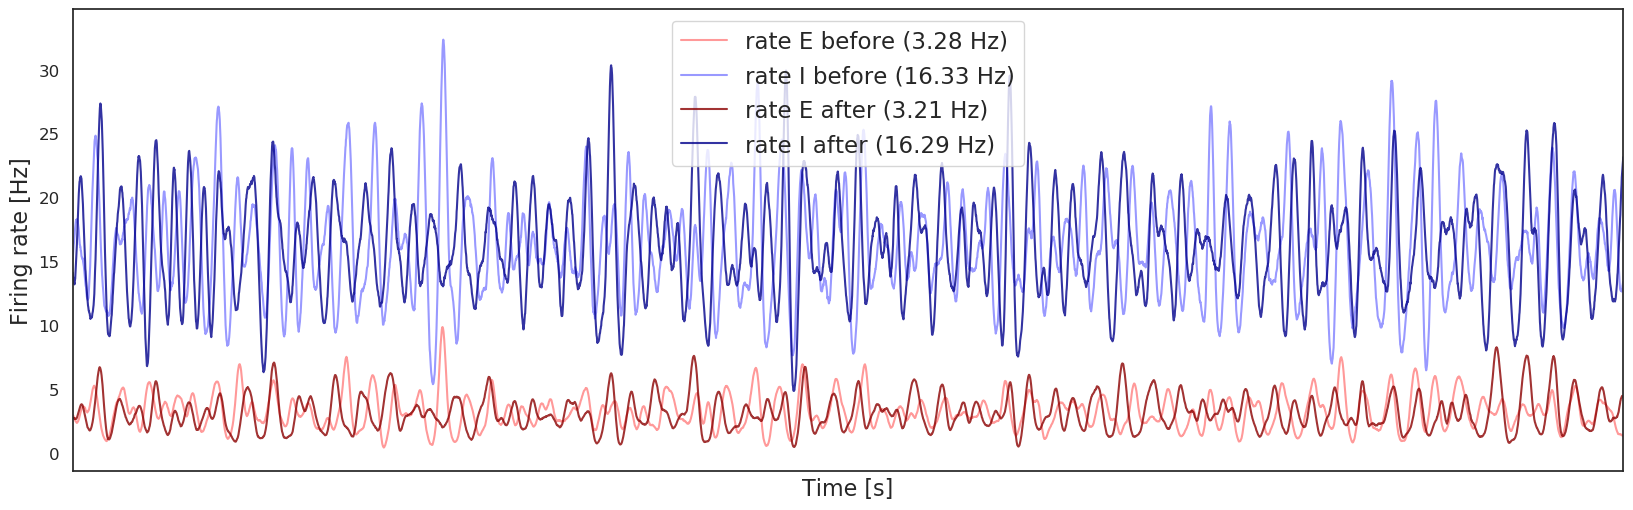

In [ ]:
fig = figure(figsize=(20, 6))
smooth_width = 1*ms
plt.plot(rate_E.t, smooth_rate(rate_E, window='gaussian', width=1 *msecond), color = 'red', alpha = 0.4, label = 'rate E before (%s Hz)'  % np.round(np.mean(rate_E.rate),2))
plt.plot(rate_I.t, smooth_rate(rate_I, window='gaussian', width=1 *msecond), color = 'blue', alpha = 0.4, label = 'rate I before (%s Hz)'  % np.round(np.mean(rate_I.rate),2))
plt.plot(rate_E.t, smooth_rate(rate_E_after, window='gaussian', width=1 *msecond), color = 'darkred', alpha = 0.8, label = 'rate E after (%s Hz)'  % np.round(np.mean(rate_E_after.rate),2))
plt.plot(rate_I.t, smooth_rate(rate_I_after, window='gaussian', width=1 *msecond), color = 'darkblue', alpha = 0.8, label = 'rate I after (%s Hz)'  % np.round(np.mean(rate_I_after.rate),2))
plt.legend()
xlabel('Time [s]', size = 16)
ylabel('Firing rate [Hz]', size = 16)
xlim(1.98, 2.62)
plt.xticks([], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

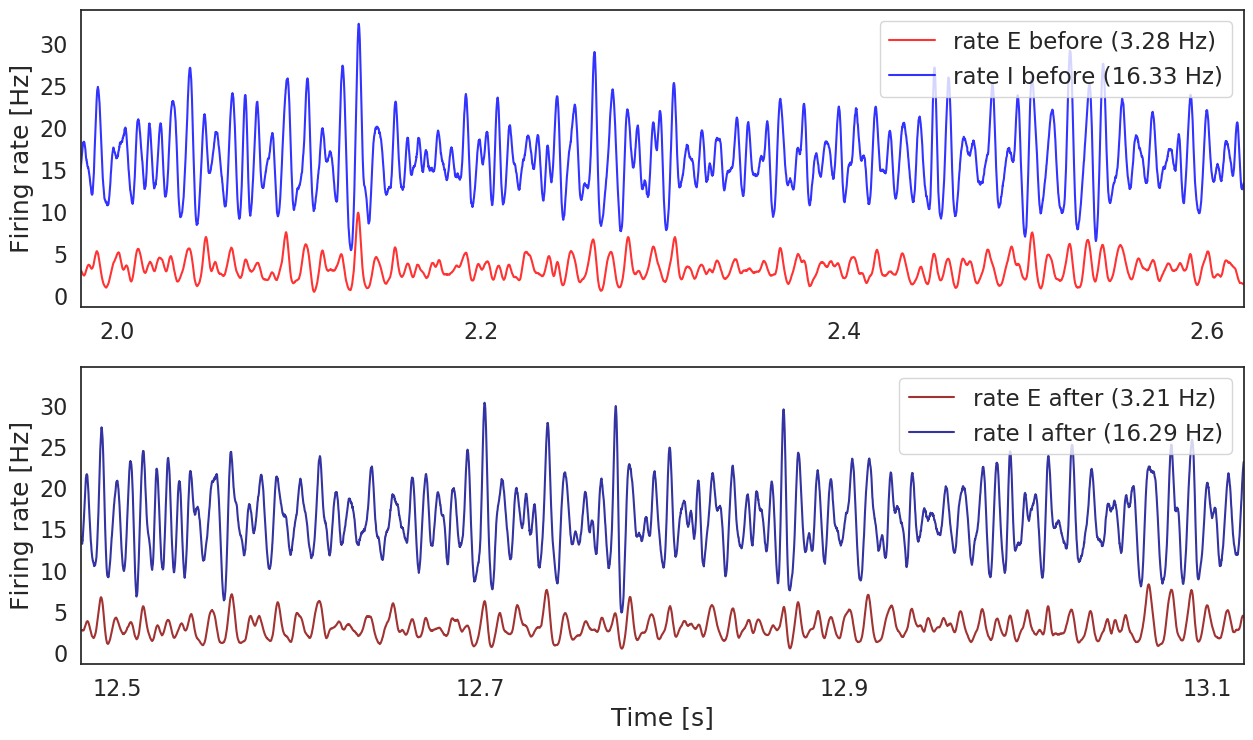

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 8.5))
ax1.plot(rate_E.t, smooth_rate(rate_E, window='gaussian', width=1 *msecond), color = 'red', alpha = 0.8, label = 'rate E before (%s Hz)'  % np.round(np.mean(rate_E.rate),2))
ax1.plot(rate_I.t, smooth_rate(rate_I, window='gaussian', width=1 *msecond), color = 'blue', alpha = 0.8, label = 'rate I before (%s Hz)'  % np.round(np.mean(rate_I.rate),2))
ax1.legend(loc = 'upper right')
ax1.set_ylabel('Firing rate [Hz]', size = 18)
ax1.set_xlim(1.98, 2.62)
ax1.set_xticks([2.0, 2.2, 2.4, 2.6])
ax1.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax1.tick_params(labelsize=16)
ax2.plot(rate_E_after.t, smooth_rate(rate_E_after, window='gaussian', width=1 *msecond), color = 'darkred', alpha = 0.8, label = 'rate E after (%s Hz)'  % np.round(np.mean(rate_E_after.rate),2))
ax2.plot(rate_I_after.t, smooth_rate(rate_I_after, window='gaussian', width=1 *msecond), color = 'darkblue', alpha = 0.8, label = 'rate I after (%s Hz)'  % np.round(np.mean(rate_I_after.rate),2))
ax2.legend(loc = 'upper right')
ax2.set_xlabel('Time [s]', size = 18)
ax2.set_ylabel('Firing rate [Hz]', size = 18)
ax2.set_xlim(12.48, 13.12)
ax2.set_xticks([12.5, 12.7, 12.9, 13.1])
ax2.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax2.tick_params(labelsize=16)
plt.show()

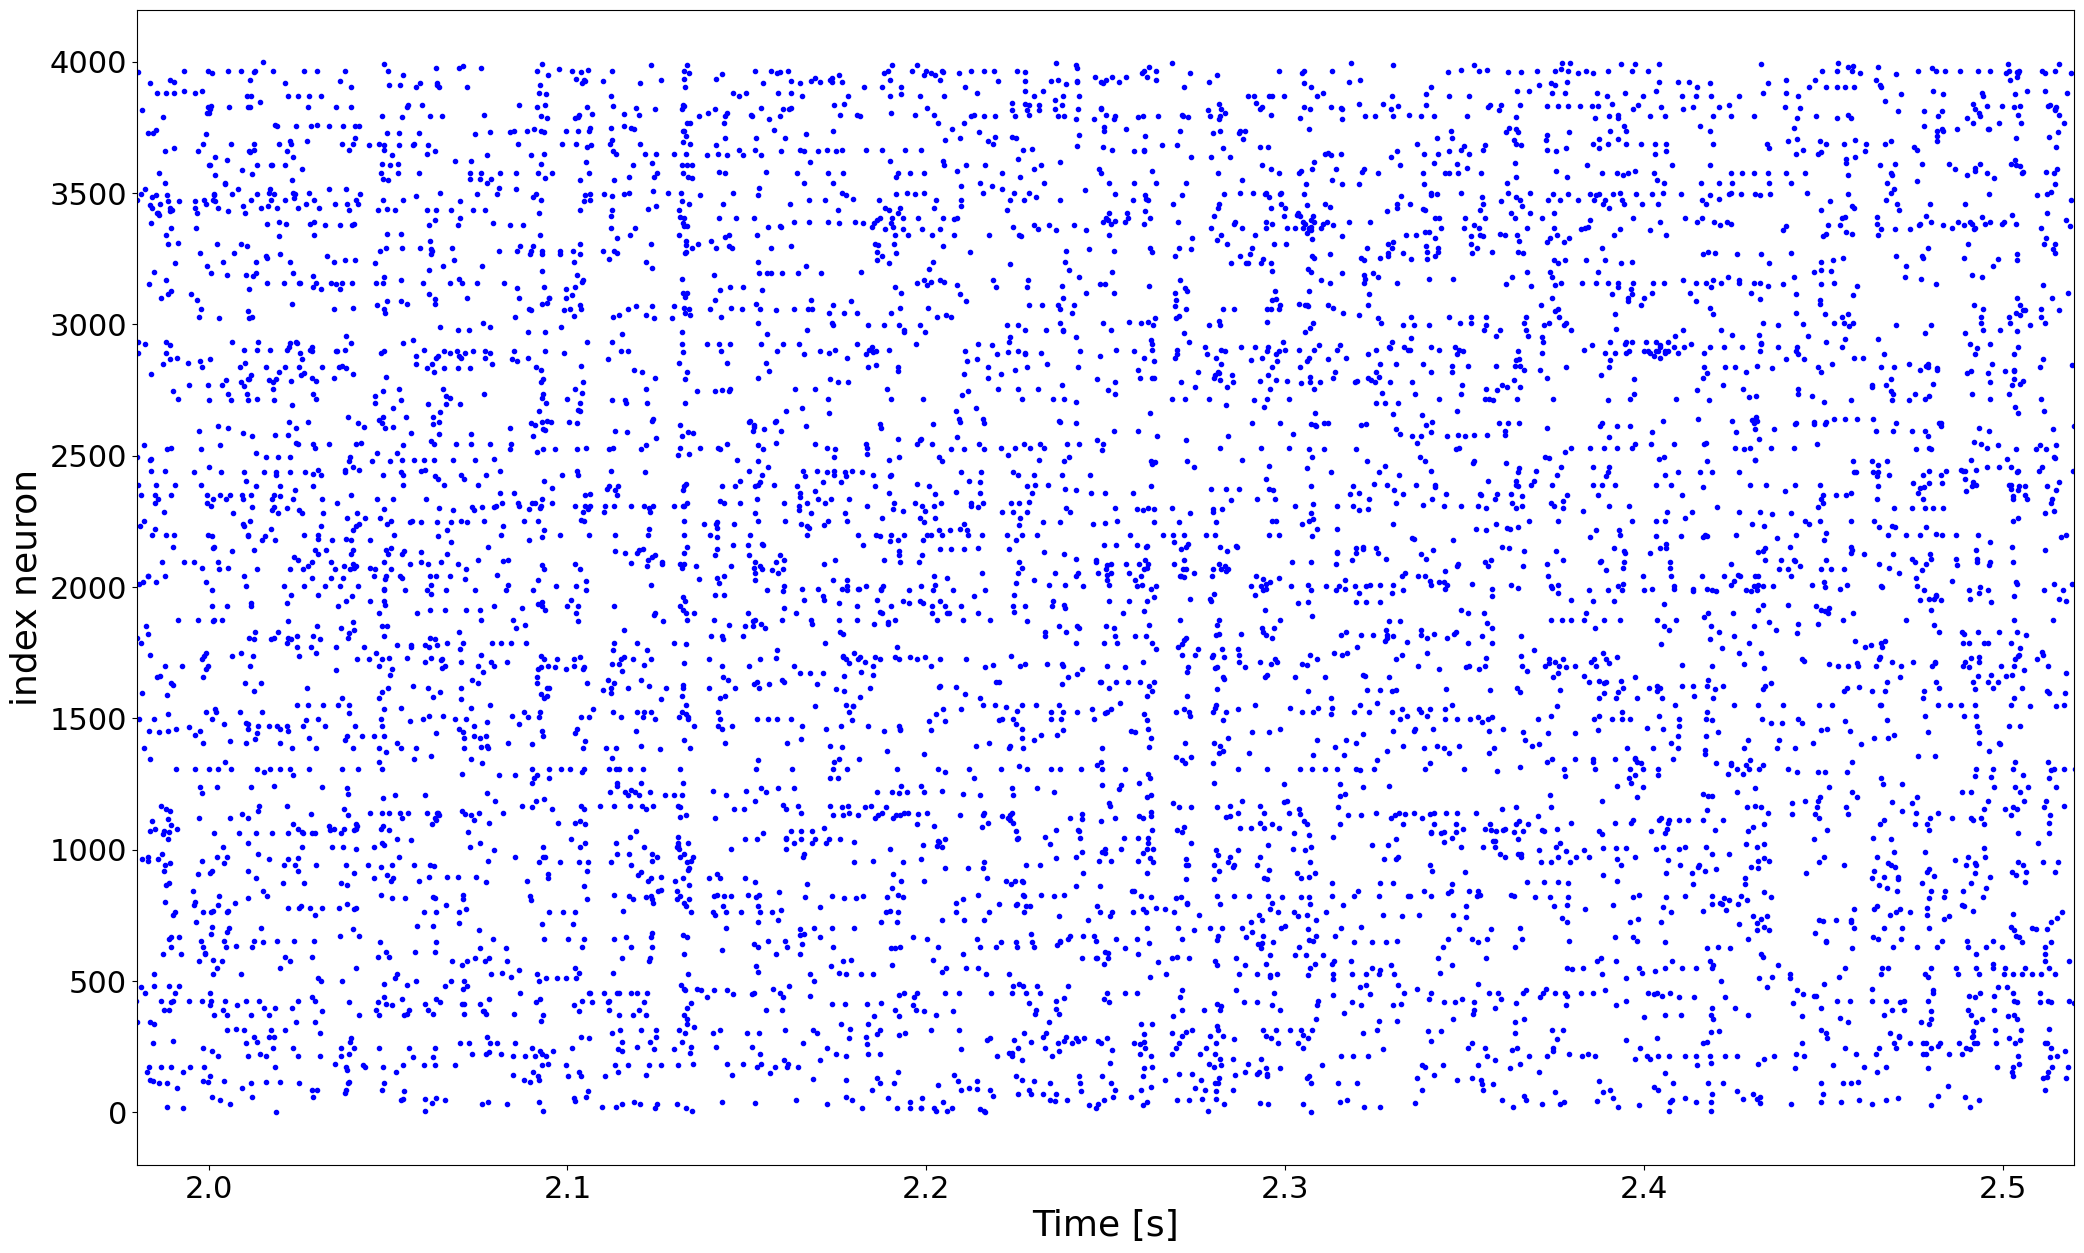

In [ ]:
fig = figure(figsize=(25, 15))
plt.plot(spikes_I.t, spikes_I.i,'.', color ='b')
xlabel('Time [s]', size = 26)
ylabel('index neuron', size = 26)
xlim(1.98, 2.52)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

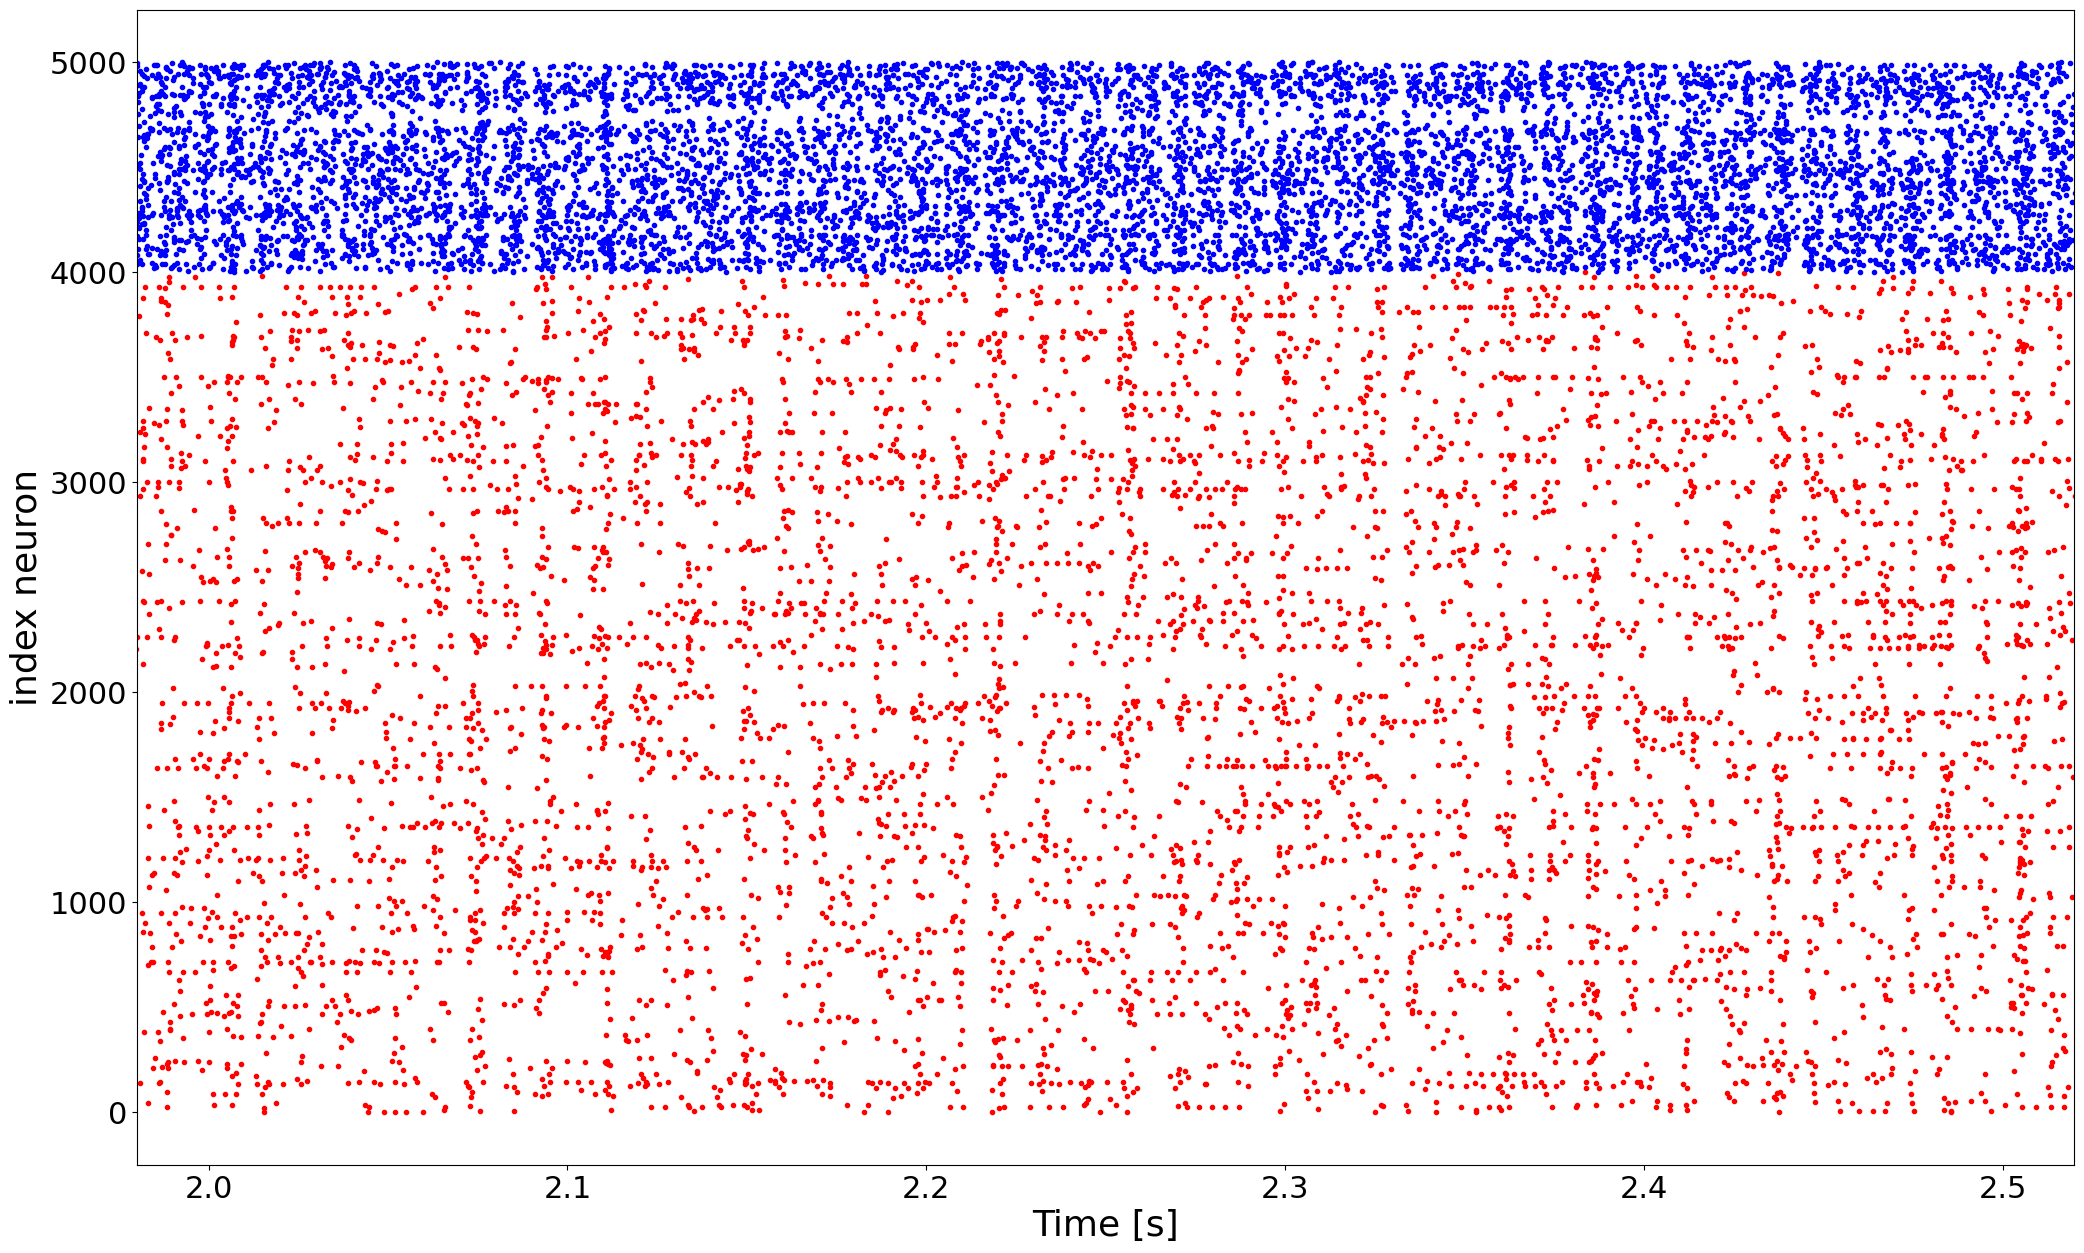

In [ ]:
fig = figure(figsize=(25, 15))
plt.plot(spikes_E.t, spikes_E.i, '.', color = 'r')
plt.plot(spikes_I.t, spikes_I.i + 4000,'.', color ='b')
xlabel('Time [s]', size = 26)
ylabel('index neuron', size = 26)
xlim(1.98, 2.52)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()

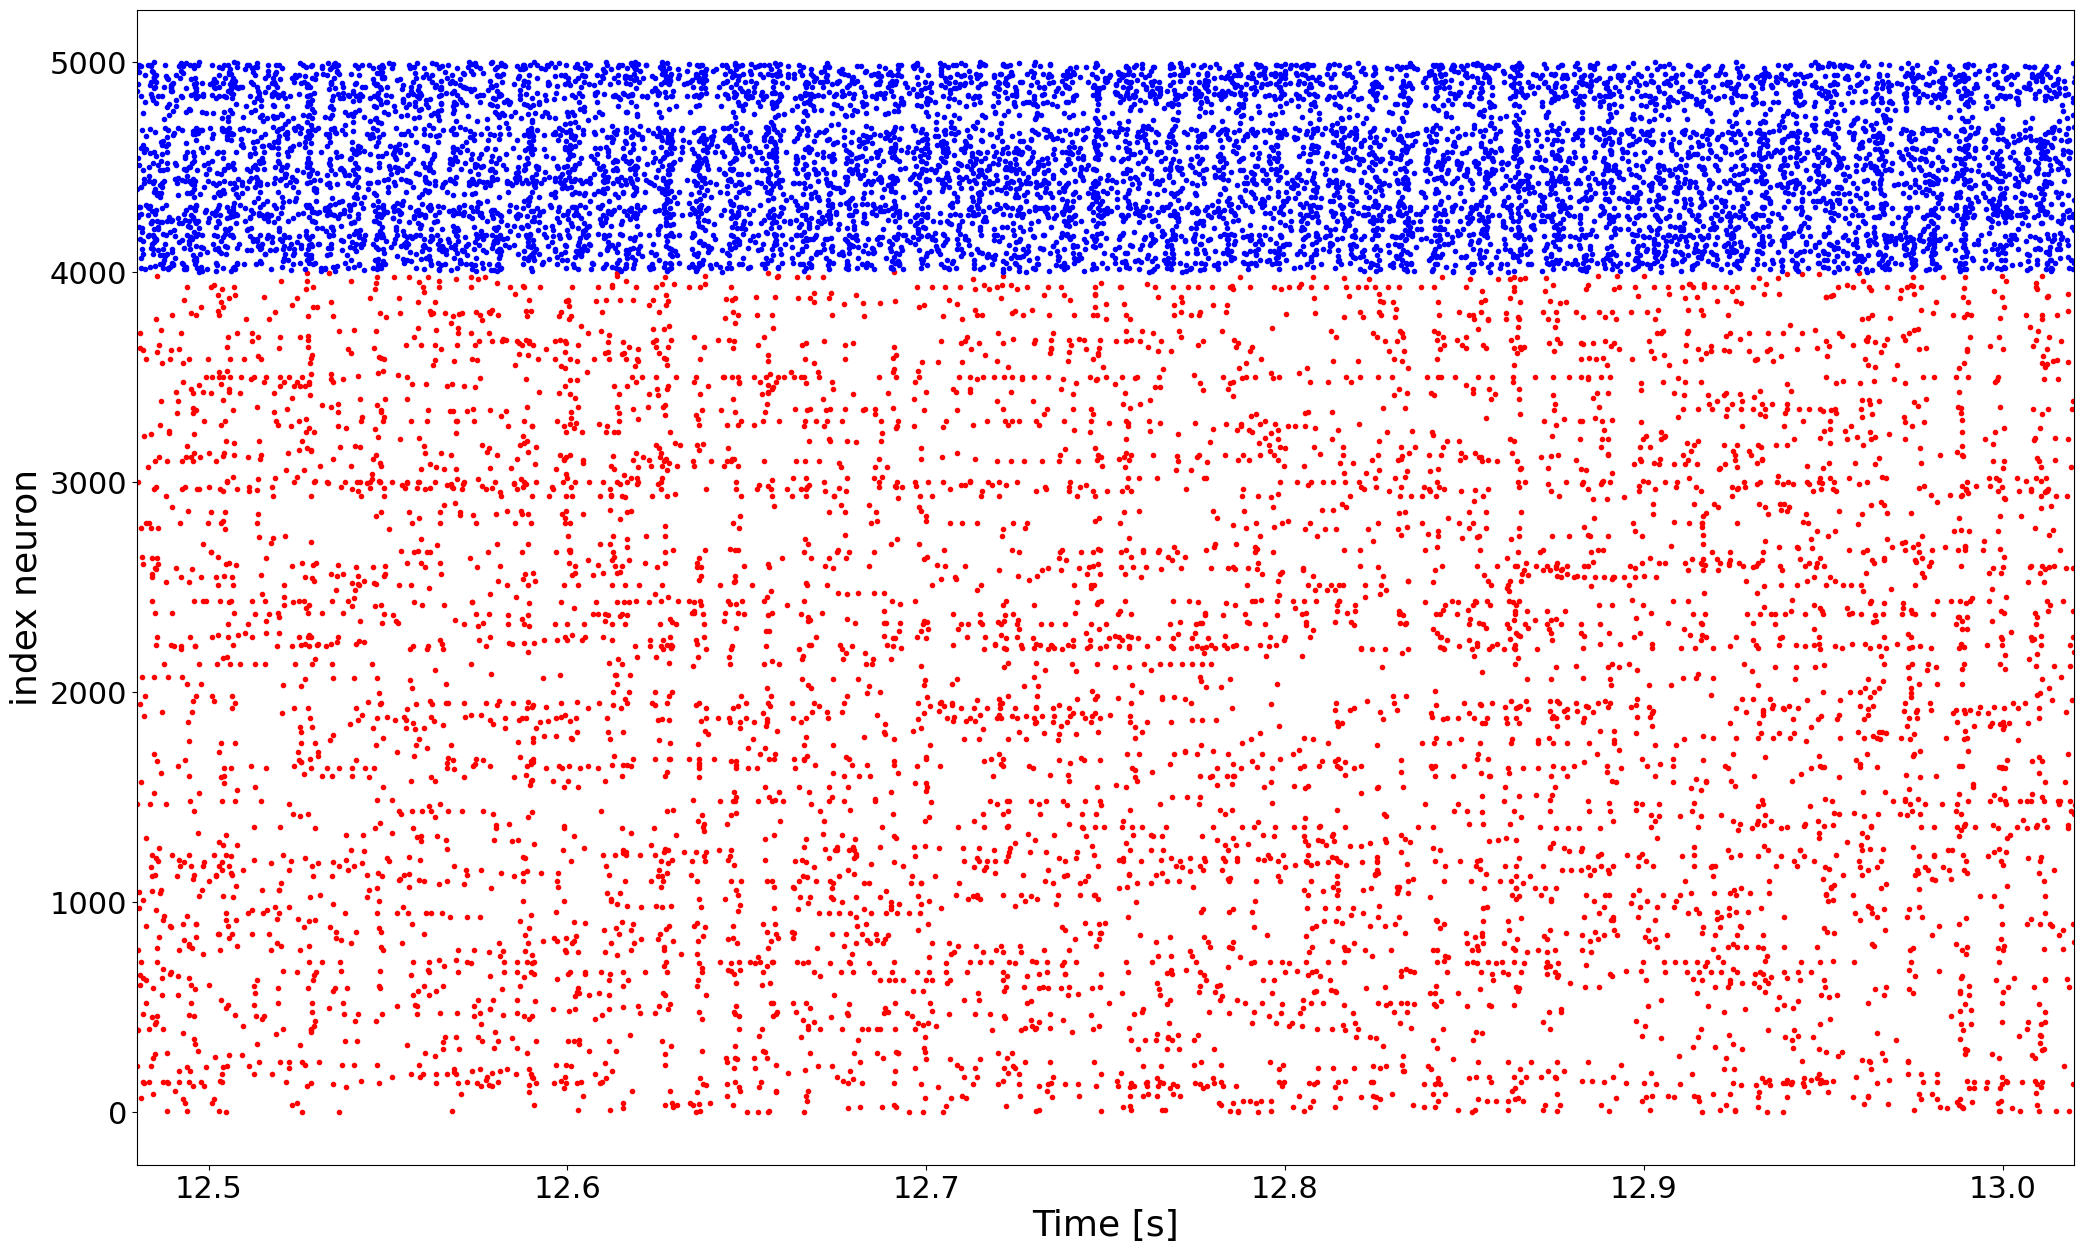

In [ ]:
fig = figure(figsize=(25, 15))
plt.plot(spikes_E_after.t, spikes_E_after.i, '.', color = 'r')
plt.plot(spikes_I_after.t, spikes_I_after.i + 4000,'.', color ='b')
xlabel('Time [s]', size = 26)
ylabel('index neuron', size = 26)
xlim(12.48, 13.02)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()